In [1]:
import numpy as np
import matplotlib.pyplot as plt
import main_urnings as mu
import pandas as pd

In [37]:
player_ids = list(np.random.randint(10000,1001001, 1000000))
item_ids = list(np.random.randint(3000,3101, 1000000))

correct_answers = list(np.random.randint(0,2,1000000))

data = mu.AlsData(player_ids, item_ids, correct_answers)

players, items, ppunch, ipunch  = data.create_players_items(player_starting_score=5,item_starting_score=5,player_urn_size=10,item_urn_size=10, so_urn_size=100)

adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=True, adaptive_urn_type="second_order_urnings", window=10, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.2)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule, data=data)
adaptive_sim.play(n_games=None, test = False)

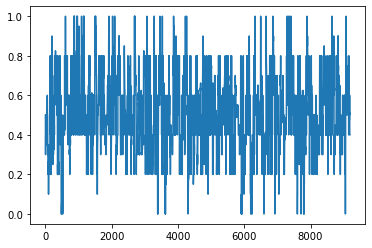

In [29]:
plt.plot(players[0].estimate_container)

In [16]:
df = pd.read_csv("df0507.csv")

player_ids = df.iloc[:,2].to_numpy()
item_ids = df.iloc[:,3].to_numpy()
correct_answers = df.iloc[:,5].to_numpy()


player_ids.shape


(3065222,)

In [9]:
from collections import Counter

c = Counter(player_ids)
most_common_player = c.most_common(1)[0][0]
most_common_player



119575791

In [35]:
data = mu.AlsData(player_ids, item_ids, correct_answers)

players, items, ppunch, ipunch  = data.create_players_items(player_starting_score=10,item_starting_score=50,player_urn_size=20,item_urn_size=100, so_urn_size=10)

adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2", paired_update=True, adaptive_urn=True, adaptive_urn_type="second_order_urnings", window=10, min_urn=8, max_urn=64, permutation_test=True, perm_p_val=0.2)
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule, data=data)
adaptive_sim.play(n_games=None, test = False)


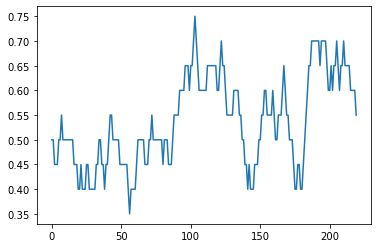

In [34]:
plt.plot(players[11].estimate_container)